In [88]:
# Kemp Carswell 801017179
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from scipy import stats
from ipywidgets import interact, fixed

In [89]:
housing = pd.DataFrame(pd.read_csv('C:/Users/kemp/Downloads/Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [90]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
 return x.map({'yes': 1, "no": 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [91]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
# Separating out the features 
x = housing.loc[:, features].values 
# Separating out the target 
y = housing['price'].values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = np.random)
# Standardizing the features 
sc_X = StandardScaler()
sc_X.fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [108]:
from sklearn.decomposition import PCA
pca30 = PCA(n_components=11)
pca30.fit(X_train)
xpca30 = pca30.transform(X_train)
X = X_train
y = Y_train
Y_test.size

109

In [93]:
from sklearn.svm import SVR
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X_test)
y_lin = svr_lin.fit(X, y).predict(X_test)
y_poly = svr_poly.fit(X, y).predict(X_test)

ValueError: x and y must be the same size

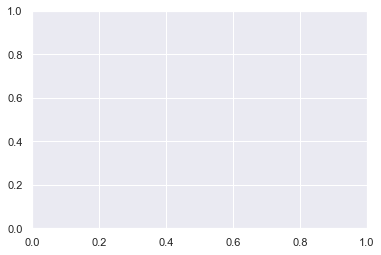

In [101]:
lw = 11
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [95]:
Y_pred = svr_rbf.predict(X_test)

In [96]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_rbf))
print("Precision:",metrics.precision_score(Y_test, y_rbf))
print("Recall:",metrics.recall_score(Y_test, y_rbf))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [97]:
Y_pred = svr_lin.predict(X_test)

In [98]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_lin))
print("Precision:",metrics.precision_score(Y_test, y_lin))
print("Recall:",metrics.recall_score(Y_test, y_lin))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [99]:
Y_pred = svr_poly.predict(X_test)

In [100]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets